In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [6]:
balance_data = pd.read_csv("balance.csv") 
#Returns the first 5 entries of the Dataframe -Bank
balance_data.head()


,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [8]:
print ("Dataset Length:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)


Dataset Lenght::  624
Dataset Shape::  (624, 5)


In [9]:
balance_data.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [10]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [12]:
clf=DecisionTreeClassifier(criterion = 'entropy',random_state=20)

In [13]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [16]:
predict=clf.predict(X_test)
accuracy_test=round(clf.score(X_test,y_test)*100,2)
accuracy_train=round(clf.score(X_train,y_train)*100,2)

print('Training accuracy of decision tree classifier',accuracy_train)
print('Testing accuracy of decision tree classifier',accuracy_test)


Training accuracy of decision tree classifier 100.0
Testing accuracy of decision tree classifier 78.19


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
cm = confusion_matrix(y_test, predict)

In [18]:
cm

array([[ 0,  7,  7],
       [11, 77,  3],
       [10,  3, 70]])

In [21]:
cm_df = pd.DataFrame(cm,
                     index = ['L','B','R'], 
                     columns = ['L','B','R'])

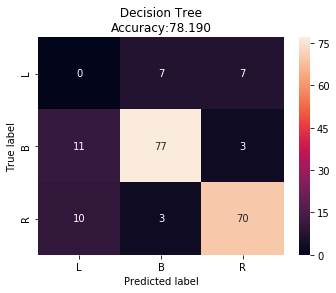

In [22]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(' Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()